<a href="https://colab.research.google.com/github/saraibare/UF6_Equipo-Ricardo/blob/main/UF_6_Actividad_Evaluable_Mapas_de_calor_y_boxplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import Series, DataFrame
from datetime import date, time, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# **1. Lectura de archivos**

In [ ]:
saldos= pd.read_excel('saldos1.xlsx')
saldos=saldos.drop('Unnamed: 0', axis = 1)
saldos.head()

,FACTURA,CVE_CLTE,FECHA_FACTURA,FECHA_VENCIMIENTO,MONTO,DÍAS_PAGO,MES_AÑO,PLAZO
0,F40238,6401,2023-02-24,2023-03-26,97485.94,30,05-2022,Corto
1,F40353,6401,2023-03-14,2023-04-13,97485.94,30,05-2022,Corto
2,F40352,4598,2023-03-14,2023-04-13,64916.21,30,05-2022,Corto
3,F40217,3930,2023-02-23,2023-03-25,52715.74,30,05-2022,Corto
4,F40173,4712,2023-02-17,2023-04-03,50639.80,45,05-2022,Largo


In [ ]:
productos = pd.read_excel('productos1.xlsx')
productos = productos.drop('Unnamed: 0', axis = 1)
productos.head(2)

,CVE_DOC,FECHA_DOC,CLIENTE,CVE_ART,CANT,PRECIO_UNI,COSTO_UNI,MARGEN_UNI,VENTA_TOTAL,COSTO_TOTAL,MARGEN_TOTAL,MARGEN_PORCEN,Rentabilidad
0,F37034,2022-05-01,PÚBLICO EN GENERAL,TUE00244,1,434.48,52.80,381.68,434.48,52.80,381.68,0.878475,Alta
1,F37036,2022-05-01,JUAN ANTONIO RESENDIZ UGALDE,TUA00028,1,1264.05,327.18,936.87,1264.05,327.18,936.87,0.741165,Alta


In [ ]:
flujo = pd.read_excel('flujo1.xlsx')
flujo.head()

,FECHA,FACT_TOTAL,DES_TOT,CRED_TOTAL,DEV_TOTAL,FACT_NETA,COSTO_MP,GASTOS,FLUJO_NETO,AÑO_MES,MES,AÑO
0,2020-01-03,14395.6995,0.00,0.0,0.0,14395.6995,0.0,0.0,14395.6995,2020-ene,ene,2020
1,2020-01-06,48179.5410,652.50,0.0,0.0,47527.0410,0.0,0.0,47527.0410,2020-ene,ene,2020
2,2020-01-07,39957.5450,1847.34,0.0,2191.0,35919.2050,0.0,0.0,35919.2050,2020-ene,ene,2020
3,2020-01-08,62769.4471,0.00,14600.0,0.0,48169.4471,0.0,0.0,48169.4471,2020-ene,ene,2020
4,2020-01-09,32383.3500,0.00,83873.0,0.0,-51489.6500,0.0,0.0,-51489.6500,2020-ene,ene,2020


In [ ]:
gastos = pd.read_excel('gastos1.xlsx')
gastos = gastos.drop(['Unnamed: 0.1','Unnamed: 0'], axis = 1)
gastos.head()

,FECHA,FOLIO,TIPO_GASTO,TOTAL_MX
0,2020-01-01,39408,MAQUINARIA,2248.28
1,2020-01-01,0001010100750847116902,COMISION BANCARIA,568.40
2,2020-01-01,0001010100752163714102,COMISION BANCARIA,226.20
3,2020-01-01,3663,HONORARIOS CONTABLES,12405.33
4,2020-01-01,944,MAQUILAS GIC,37200.00


# **2. Análisis de variables**

## **Flujo**

<Figure size 1500x800 with 0 Axes>

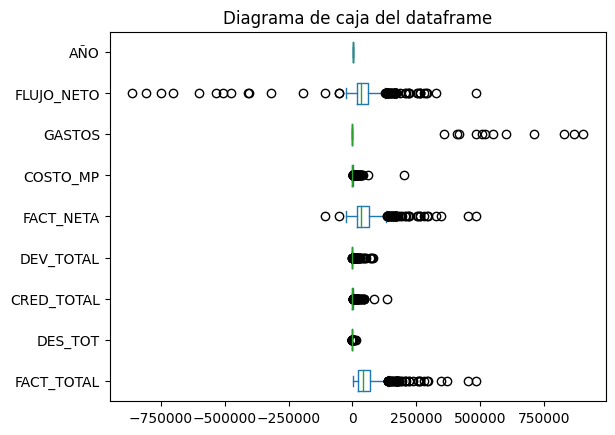

In [ ]:
fig = plt.figure(figsize =(15, 8))
flujo.plot(kind='box', vert=False)
plt.title("Diagrama de caja del dataframe")
plt.show() 

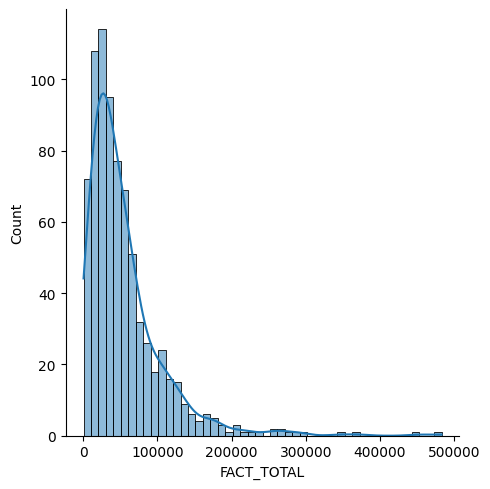

In [ ]:
sns.displot(data=flujo, x='FACT_TOTAL', kde=True)

In [ ]:
flujo_num = flujo.select_dtypes(include='number')
y=flujo_num
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr

flujo2= flujo_num[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
flujo2 = flujo2.fillna(round(flujo2.mean(),1))

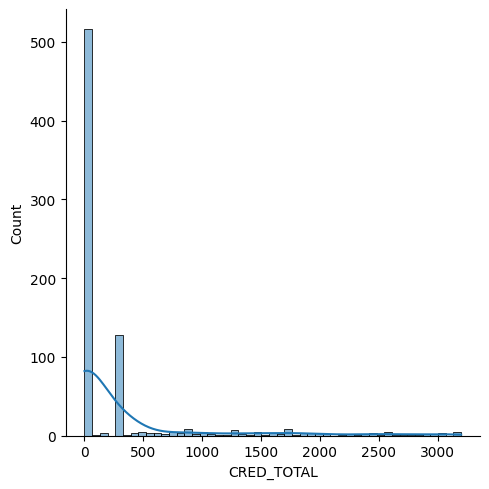

In [ ]:
sns.displot(data=flujo2, x='CRED_TOTAL', kde=True)

## **Gastos**

(array([3.000e+00, 4.484e+03, 2.530e+02, 1.000e+01, 7.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([-56732.51 , -16059.259,  24613.992,  65287.243, 105960.494,
        146633.745, 187306.996, 227980.247, 268653.498, 309326.749,
        350000.   ]),
 <BarContainer object of 10 artists>)

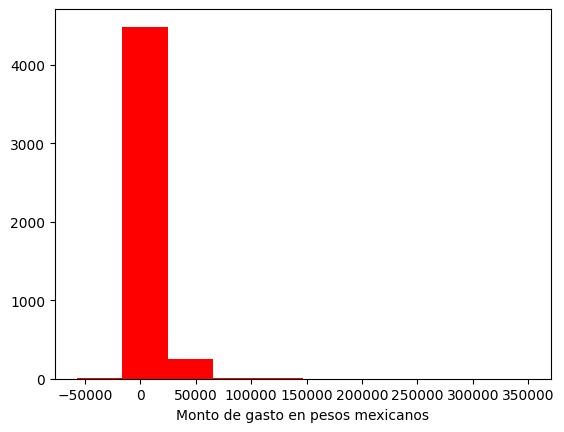

In [ ]:
total=gastos["TOTAL_MX"]
plt.xlabel('Monto de gasto en pesos mexicanos')
plt.hist(total, color="red")

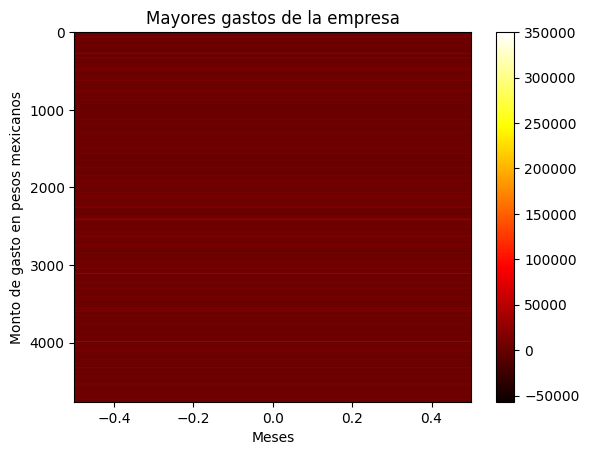

In [ ]:
gasto = gastos.iloc[:, -1:]

plt.imshow(gasto, cmap='hot', aspect='auto')
plt.colorbar()
plt.xlabel('Meses')
plt.ylabel('Monto de gasto en pesos mexicanos')
plt.title('Mayores gastos de la empresa')

plt.show()

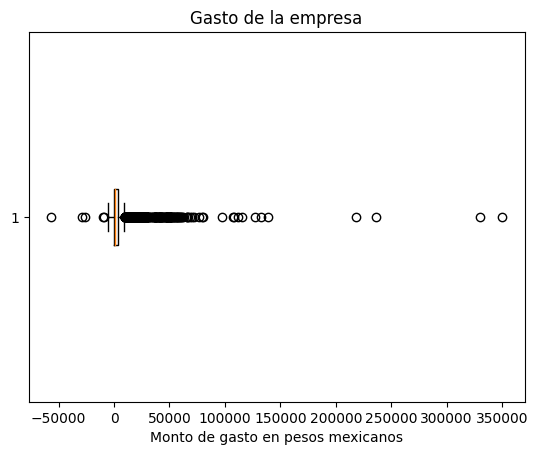

In [ ]:
diagrama = gastos.iloc[:, -1]

plt.boxplot(diagrama, vert=False)
plt.xlabel('Monto de gasto en pesos mexicanos')
plt.title('Gasto de la empresa')

plt.show()


## **Productos**

In [ ]:
y=productos
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
#Encontramos Ouliers del Dataframe
outliers= productos[(y>Limite_Superior)|(y<Limite_Inferior)]
df2= productos[(y<=Limite_Superior)&(y>=Limite_Inferior)]

<ipython-input-13-57add4447ab7>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-13-57add4447ab7>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-13-57add4447ab7>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-13-57add4447ab7>:3: FutureWarning: DataFrame.mean and DataFrame.m

In [ ]:
data_clean=productos.copy()
data_clean=data_clean.fillna(round(df2.mean(),1))
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

<ipython-input-14-9e3b41b899ab>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data_clean=data_clean.fillna(round(df2.mean(),1))


CVE_DOC          0
FECHA_DOC        0
CLIENTE          0
CVE_ART          0
CANT             0
PRECIO_UNI       0
COSTO_UNI        0
MARGEN_UNI       0
VENTA_TOTAL      0
COSTO_TOTAL      0
MARGEN_TOTAL     0
MARGEN_PORCEN    0
Rentabilidad     0
dtype: int64

<Axes: xlabel='MARGEN_TOTAL'>

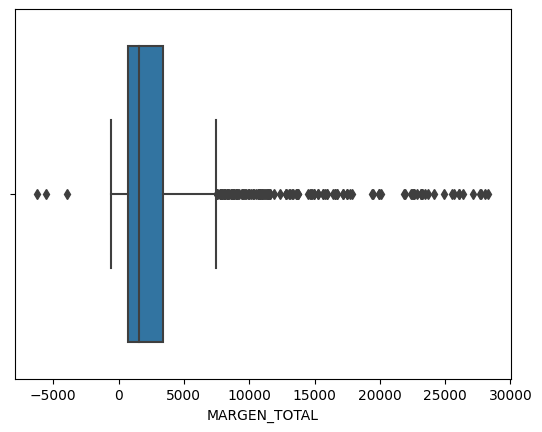

In [ ]:
sns.boxplot(data=df2, x="MARGEN_TOTAL")

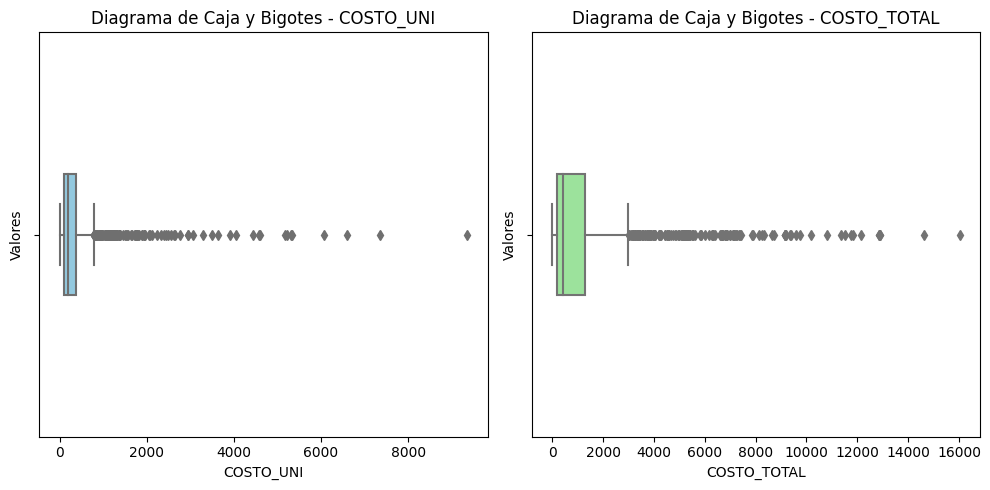

In [ ]:
# Crear una figura y ejes para los diagramas de caja y bigotes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Diagrama de caja y bigotes para la columna COSTO_UNI
sns.boxplot(x=df2['COSTO_UNI'], ax=ax1, color='skyblue', width=0.3)
ax1.set(xlabel='COSTO_UNI', ylabel='Valores', title='Diagrama de Caja y Bigotes - COSTO_UNI')

# Diagrama de caja y bigotes para la columna COSTO_TOTAL
sns.boxplot(x=df2['COSTO_TOTAL'], ax=ax2, color='lightgreen', width=0.3)
ax2.set(xlabel='COSTO_TOTAL', ylabel='Valores', title='Diagrama de Caja y Bigotes - COSTO_TOTAL')

# Ajustar el espacio entre subtramas
plt.tight_layout()

# Mostrar la gráfica
plt.show()

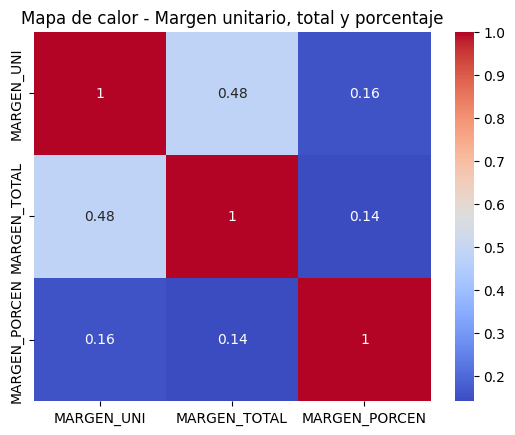

In [ ]:
# Seleccionar las columnas de interés
data = df2[['MARGEN_UNI', 'MARGEN_TOTAL', "MARGEN_PORCEN" ]]

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Configurar título
plt.title('Mapa de calor - Margen unitario, total y porcentaje')

# Mostrar el mapa de calor
plt.show()


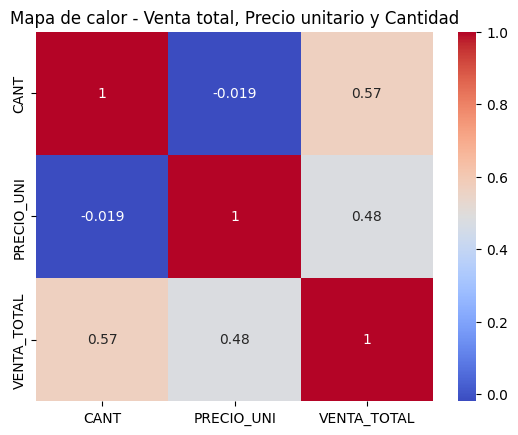

In [ ]:
# Seleccionar las columnas de interés
data = df2[['CANT', 'PRECIO_UNI', "VENTA_TOTAL" ]]

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Configurar título
plt.title('Mapa de calor - Venta total, Precio unitario y Cantidad')

# Mostrar el mapa de calor
plt.show()

## **Saldos**

In [ ]:
variables = ["FACTURA", "CVE_CLTE", "FECHA_FACTURA", "FECHA_VENCIMIENTO", "MONTO", "DÍAS_PAGO", "MES_AÑO", "PLAZO"]
saldos_selec = saldos[variables]

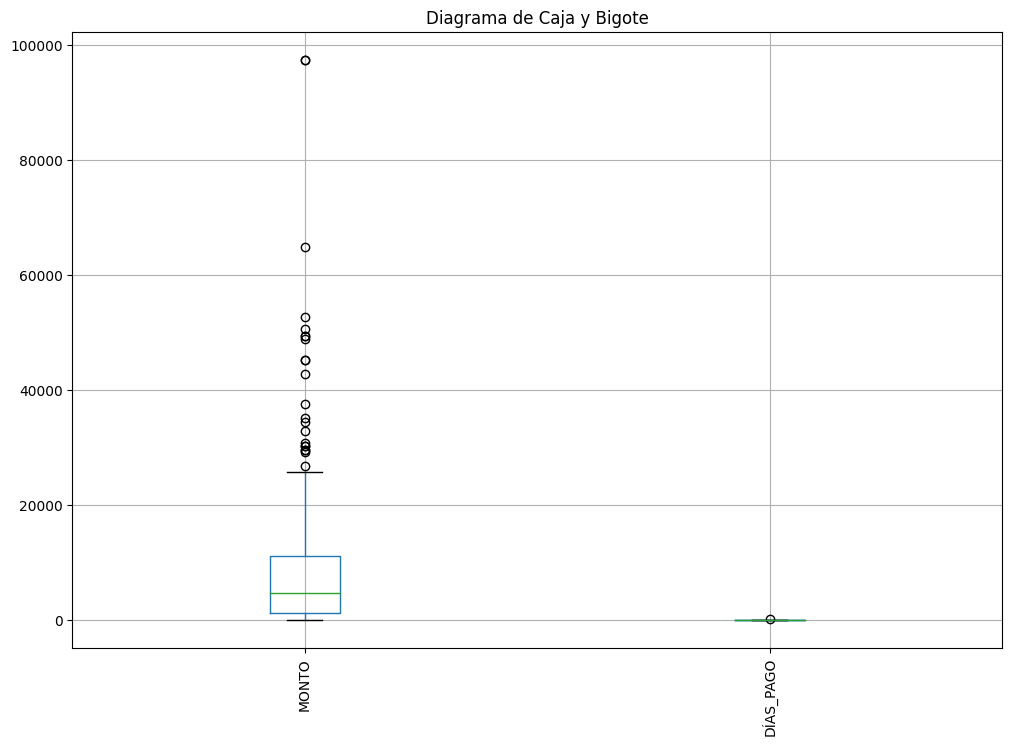

In [ ]:
plt.figure(figsize=(12, 8))
saldos_selec.boxplot()
plt.title('Diagrama de Caja y Bigote')
plt.xticks(rotation=90)
plt.show()

<Figure size 40000x40000 with 0 Axes>

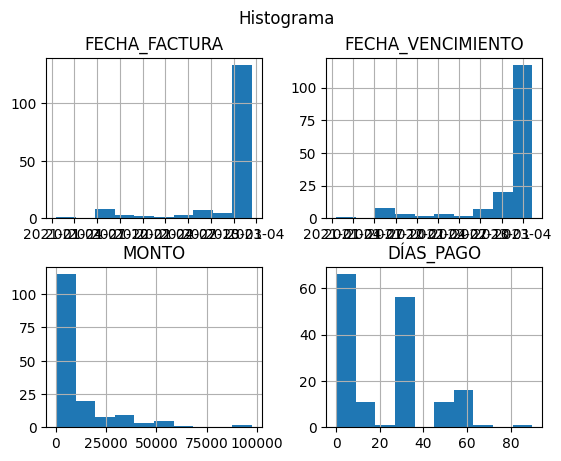

In [ ]:
plt.figure(figsize=(400, 400))
saldos_selec.hist()
plt.suptitle('Histograma')
plt.show()

<ipython-input-22-cddd28f12f6b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(saldos_selec.corr(), annot=True, cmap='coolwarm')


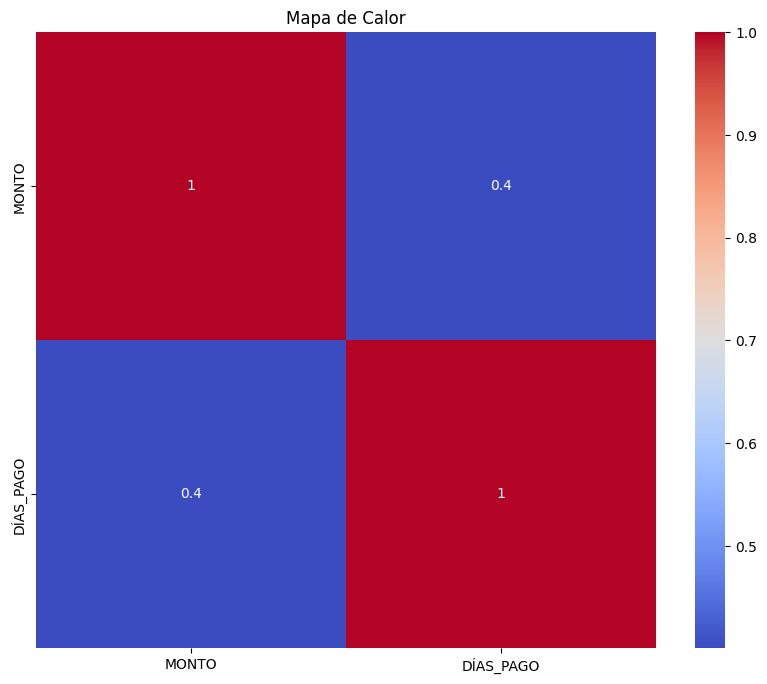

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(saldos_selec.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor')
plt.show()

# **3. Preguntas**

**¿Hay alguna variable que no aporta información?**

Se identificaron que las variables más importantes son: 
- **Saldos**: Las dos variables de fecha (que indican la fecha de elaboración de la factura y vencimiento), monto del adeudo y las columnas clave (clave de factura y cliente). 
- **Productos**: Fecha de la factura, clave de la factura (identificador clave), precio de venta, costo y margen tanto totales como unitarios. 
- **Facturas**:  Las dos variables de fecha (que indican la fecha de elaboración de la factura y vencimiento), los dos identificadores clave (clave de factura y cliente), status para tomar sólo aquellas que fueron emitidas, cantidad total (representa el ingreso total de la factura) y descuentos totales. 
- **Créditos**: Las dos variables de fecha (que indican la fecha de elaboración de la factura y vencimiento), los tres identificadores clave (clave de factura, crédito y cliente), status para tomar sólo aquellas que fueron emitidas y cantidad total (representa el crédito total de la factura). 
- **Descuentos**: Las dos variables de fecha (que indican la fecha de elaboración de la factura y vencimiento), los tres identificadores clave (clave de factura, devolución y cliente), status para tomar sólo aquellas que fueron emitidas y cantidad total (representa la devolución total de la factura). 
- **Gastos**: La fecha que se emitió el gasto, el tipo de gasto, el total y el estatus, para entender el flujo operativo y si están teniendo pérdidas. La única variable que se podría decir que no aporta información como tal, sería la de "FOLIO", sin embargo es importante categorizar estos gastos bajo un número de folio para una majoer organización y ahorro de tiempo.





**Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?**

Para comenzar, se eliminaron los datos no relevantes en función al objetivo final. De facturas, créditos y devoluciones se eliminaron "FECHA_ENT" y "FECHA_DOC", debido a que representan la misma información que "FECHAELAB". Simultáneamente, se eliminó "FECHA_CANCELA", puesto que la columna "STATUS" ya nos indica si debemos tomar en cuenta o no esa factura. Todas las demás columnas eliminadas se descartaron por su poca relevancia, o debido a que eran columnas con puros datos nulos. De gastos, se eliminaron todas las filas que correspondían a los gastos "COMPRAS", a indicación de Nora Casillas, debido a que no son parte de los gastos administrativos, de ventas y financieros, así como los costos mencionados.

De igual manera, se filtraron las bases de datos de manera que solo resten las variables encaminadas al cumplimiento del objetivo final. De ahí que las columnas más importantes son la fecha y los montos (de los adeudos, de las facturas, devoluciones, créditos y gastos), sin embargo, también se dejaron los identificadores clave. En algunas, se tuvo que filtrar las filas para que solo sean consideradas las facturas emitidas, dejando a un lado las canceladas. Las ventas, costos y márgenes fueron filtradas, puesto que resultan relevantes si se quiere hacer un análisis de los productos más demandados o rentables.



**¿Existen variables que tengan datos extraños?**

Se verificó con la función isnull si existen datos nulos y cuántos son. Dado que la mayoría de valores faltantes corresponden a variables categóricas (como claves o folios), se optó por rellenarlo con "--", para deshacernos de ellos sin eliminar columnas o filas completas.

Para saber si existen valores atípicos, se aplicó la función describe, la cual nos permite saber los mínimos y máximos, e identificar si están muy alejados de la mediana. Aunque se identificaron varios datos atípicos en los dataframes, no se modificarán, debido a que representan el flujo de efectivo. Si se realiza una modificación, afectarían sus ingresos y no se tendría un control y conocimiento real de los ingresos. Por ejemplo, en cuanto a gastos, se podría decir que la variable de "TOTAL_MX" que representa el total de los gastos de cada fecha asignada, tiene valores atipicos como -5.000 o montos grandes de 35.000, que podrian representar un gasto único que tuvo que hacer la empresa. Además, podemos ver que la mayoría de sus gastos rondan en los 5.000 pesos.


**Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?**



No, dado que son cuentas cuya naturaleza es muy diferente entre ellas, tenemos variables que van desde 0 hasta medio millón de pesos (como las ventas), mientras que otras apenas llegan a 10 mil (como los descuentos). Sin embargo, al tratarse de entradas y salidas de efectivo, no sería adecuado deshacernos de los outliers para que todas las cuentas tengan un rango similar. 

**¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?**


Primeramente, en el dataset flujo, podemos observar que hay cuentas con cantidades excesivamente grandes, como la facturación total y los gastos, sin embargo, no se pueden tratar como grupos parecidos, puesto que son ingresos y egresos respectivamente. 

En saldos, no existen grupos de variables similares, pues uno habla de montos y otro de días de pago. 

Por otra parte, en gastos, se pueden agrupar en grupos similares por características; es decir, hay gastos que corresponden a los administrativos, financieros, ventas, entre muchos otros. 

Finalmente, en productos, se podría decir que existe una escala similar de precio unitario con la venta total, similarmente con los costos y los márgenes, pues las ventas, costos y márgenes totales se derivan de las columnas unitarias. 

In [ ]:
%%shell
jupyter nbconvert --to html UF_6_Actividad_Evaluable_Mapas_de_calor_y_boxplots.ipynb

[NbConvertApp] Converting notebook UF_6_Actividad_Evaluable_Mapas_de_calor_y_boxplots.ipynb to html
[NbConvertApp] Writing 1038768 bytes to UF_6_Actividad_Evaluable_Mapas_de_calor_y_boxplots.html
